<a href="https://colab.research.google.com/github/raulbenitez/postgrau_IML_exploratory/blob/master/EJERCICIO_WALLMART/Ejercicio_PCA_clustering_data_Albert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cargamos los datos:

In [ ]:
import pandas as pd

df_ini = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/1962_2006_walmart_store_openings.csv')
df_ini.head()

storenum OPENDATE date_super  conversion  ...       LON  MONTH DAY  YEAR
0         1   7/1/62     3/1/97         1.0  ... -94.07141      7   1  1962
1         2   8/1/64     3/1/96         1.0  ... -93.09345      8   1  1964
2         4   8/1/65     3/1/02         1.0  ... -94.50208      8   1  1965
3         8  10/1/67     3/1/93         1.0  ... -92.75858     10   1  1967
4         7  10/1/67        NaN         NaN  ... -92.30229     10   1  1967

[5 rows x 16 columns]

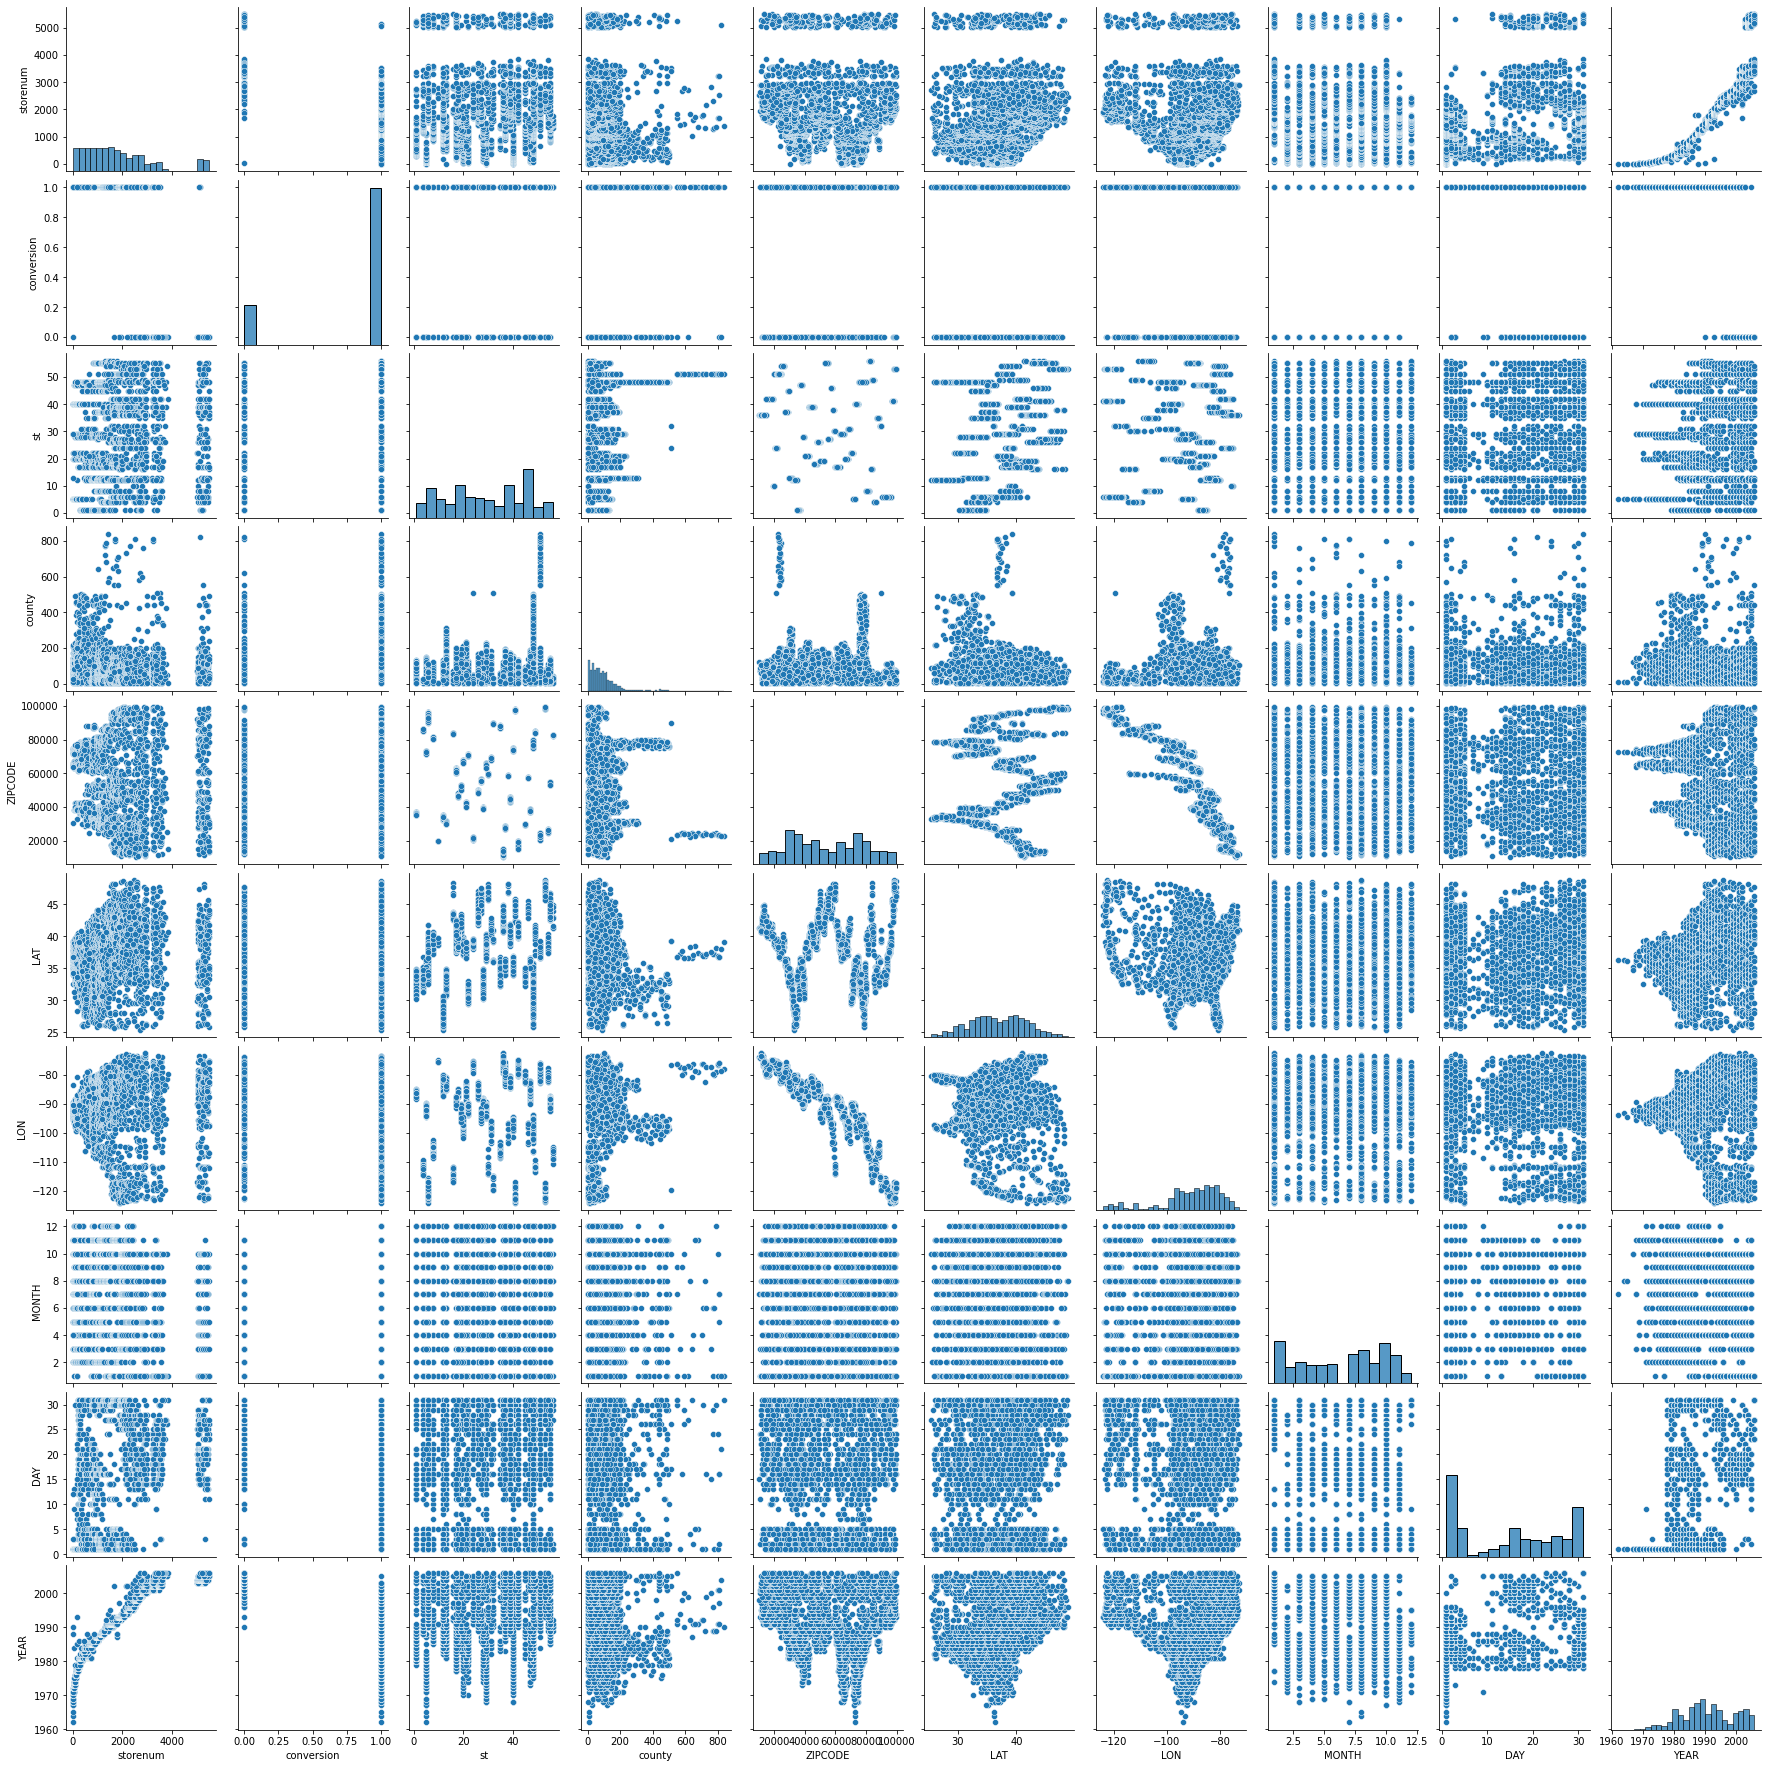

In [ ]:
import seaborn as sns
sns.pairplot(df_ini)

Limpiamos los datos manteniendo solo las variables numéricas y eliminando los NaNs:

In [ ]:
df_num = df_ini.select_dtypes(include='number') # mantener solo variables numéricas
df_num_nonans = df_num.dropna() # borrar NaNs
#df_num_nonans_nb = df_num_nonans.drop(columns='conversion') #si vulguéssim eliminar columnes discretes
df_num_nonans.head()

storenum  conversion  st  county  ...       LON  MONTH  DAY  YEAR
0         1         1.0   5       7  ... -94.07141      7    1  1962
1         2         1.0   5       9  ... -93.09345      8    1  1964
2         4         1.0   5       7  ... -94.50208      8    1  1965
3         8         1.0   5      29  ... -92.75858     10    1  1967
5        10         1.0  40      21  ... -94.97185      7    1  1968

[5 rows x 10 columns]

In [ ]:
print('datos originales = {}'.format(df_ini.shape))
print('datos numericos = {}'.format(df_num.shape))
print('datos numericos sin NaNs = {}'.format(df_num_nonans.shape))

datos originales = (2992, 16)
datos numericos = (2992, 10)
datos numericos sin NaNs = (1946, 10)


Reducimos dimensionalidad aplicando PCA:

In [ ]:
X = df_num_nonans

# scale data:
from sklearn.preprocessing import StandardScaler
XS = StandardScaler().fit_transform(X)

# PCA decomopositon:
from sklearn import decomposition
n_variables = df_num.shape[1]
pca = decomposition.PCA(n_components=n_variables).fit(XS)

# varianza explicada acumulada:
print('varianza explicada acumulada ={}'.format(100*pca.explained_variance_ratio_.cumsum()))

# project data into PCA space:
Xproj = pca.transform(XS)
Xproj.shape

varianza explicada acumulada =[ 29.96540273  49.05169354  61.89097376  72.90042761  82.02558791
  89.77789524  95.62396707  98.57335388  99.39559842 100.        ]


(1946, 10)

Proyectar los datos en un espacio de dimensionalidad reducida de 9D a 7D:

Dimensionalidad datos en espacio PCA reducido = (1946, 7)


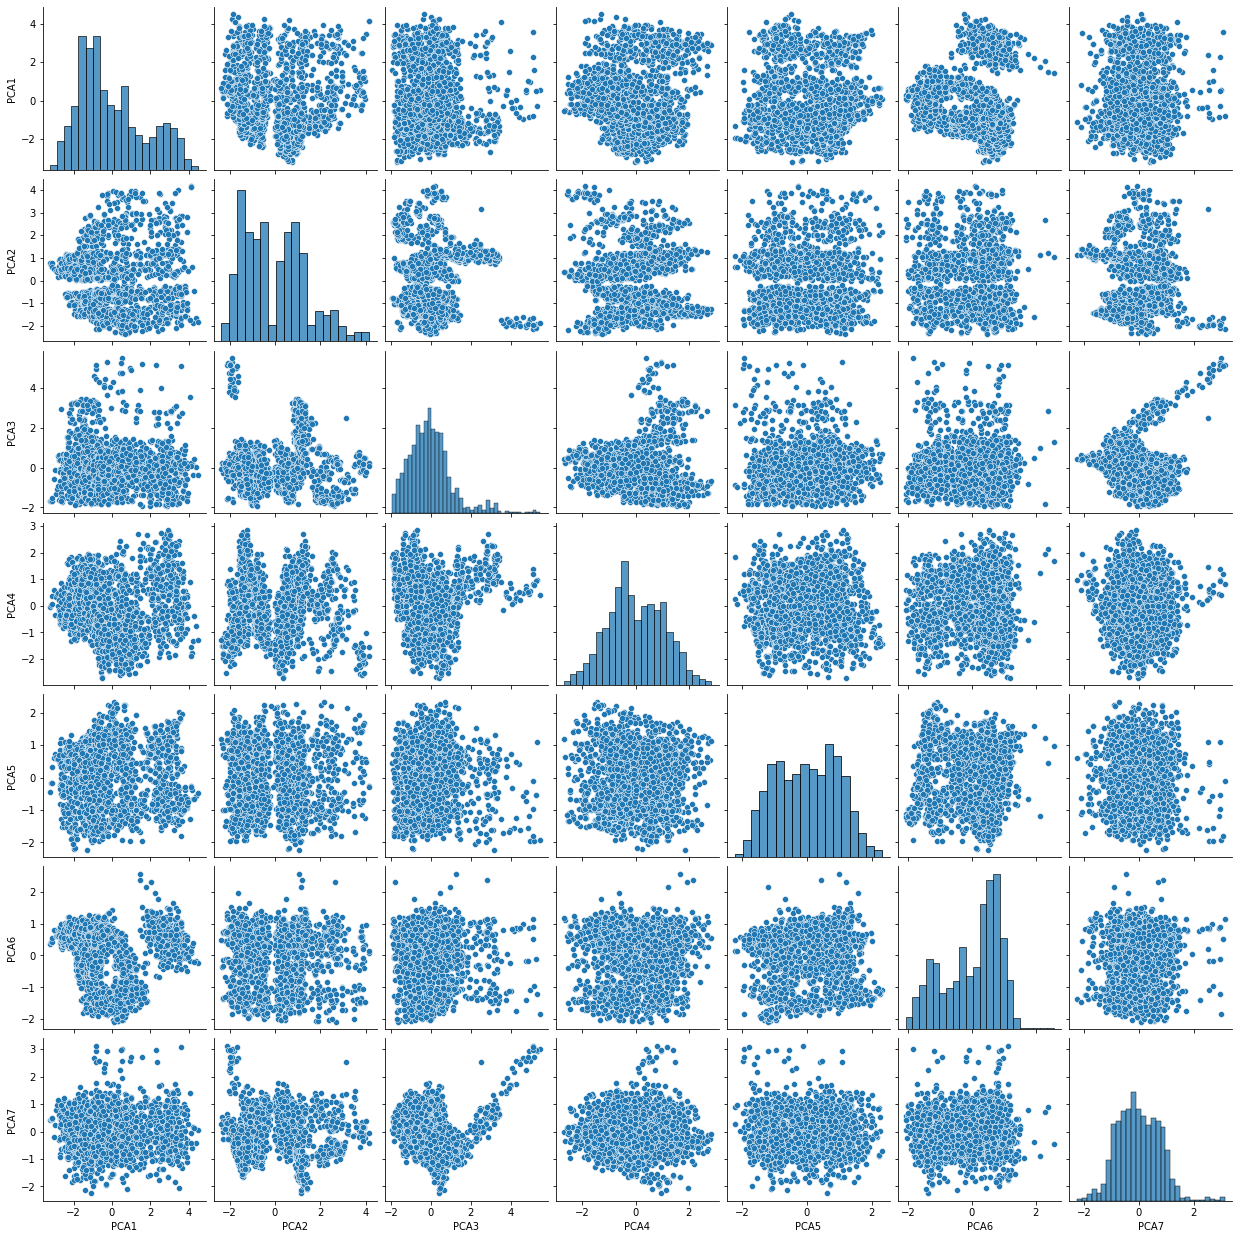

In [ ]:
import matplotlib.pyplot as plt

# Reducir dimensionalidad de los datos quedandonos con siete componentes PCA:
ndim_reducida = 7 # establecer dimensionalidad reducida a partir de la varianza explicada por cada componente
XPCA = Xproj[:,0:ndim_reducida]

print('Dimensionalidad datos en espacio PCA reducido = {}'.format(XPCA.shape))

d = pd.DataFrame(XPCA,columns=['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7'])
sns.pairplot(d)
plt.show()

Proyectar solo los datos PCA1 y PCA2;

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


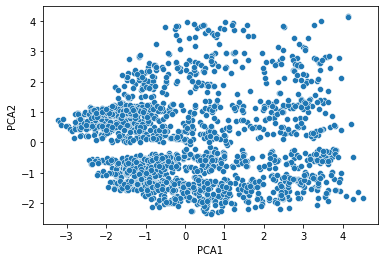

<Figure size 576x576 with 0 Axes>

In [ ]:
sns.scatterplot("PCA1", "PCA2",data=d)
fig = plt.figure(figsize=(8,8))
plt.show()

Clustering:

In [ ]:
import numpy as np
from sklearn.cluster import KMeans 
D = np.array(d)
group = KMeans(n_clusters=4).fit_predict(D[:,[1, 2]])
print(group)

[1 1 1 ... 1 0 2]


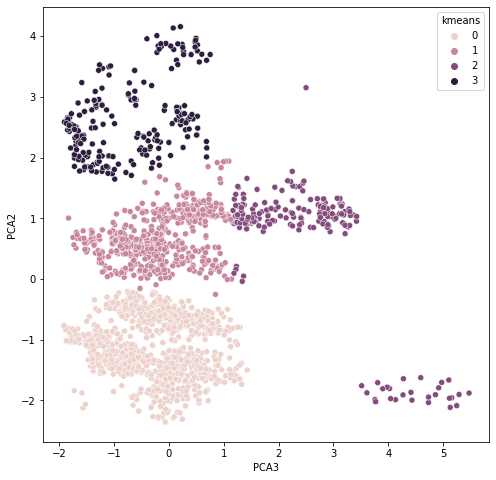

In [ ]:
df = pd.DataFrame(D[:,[1, 2]],columns=['PCA2','PCA3'])
df['kmeans'] = group 
fig = plt.figure(figsize=(8,8)) 
sns.scatterplot(x='PCA3',y='PCA2',hue='kmeans',data=df)
plt.show()

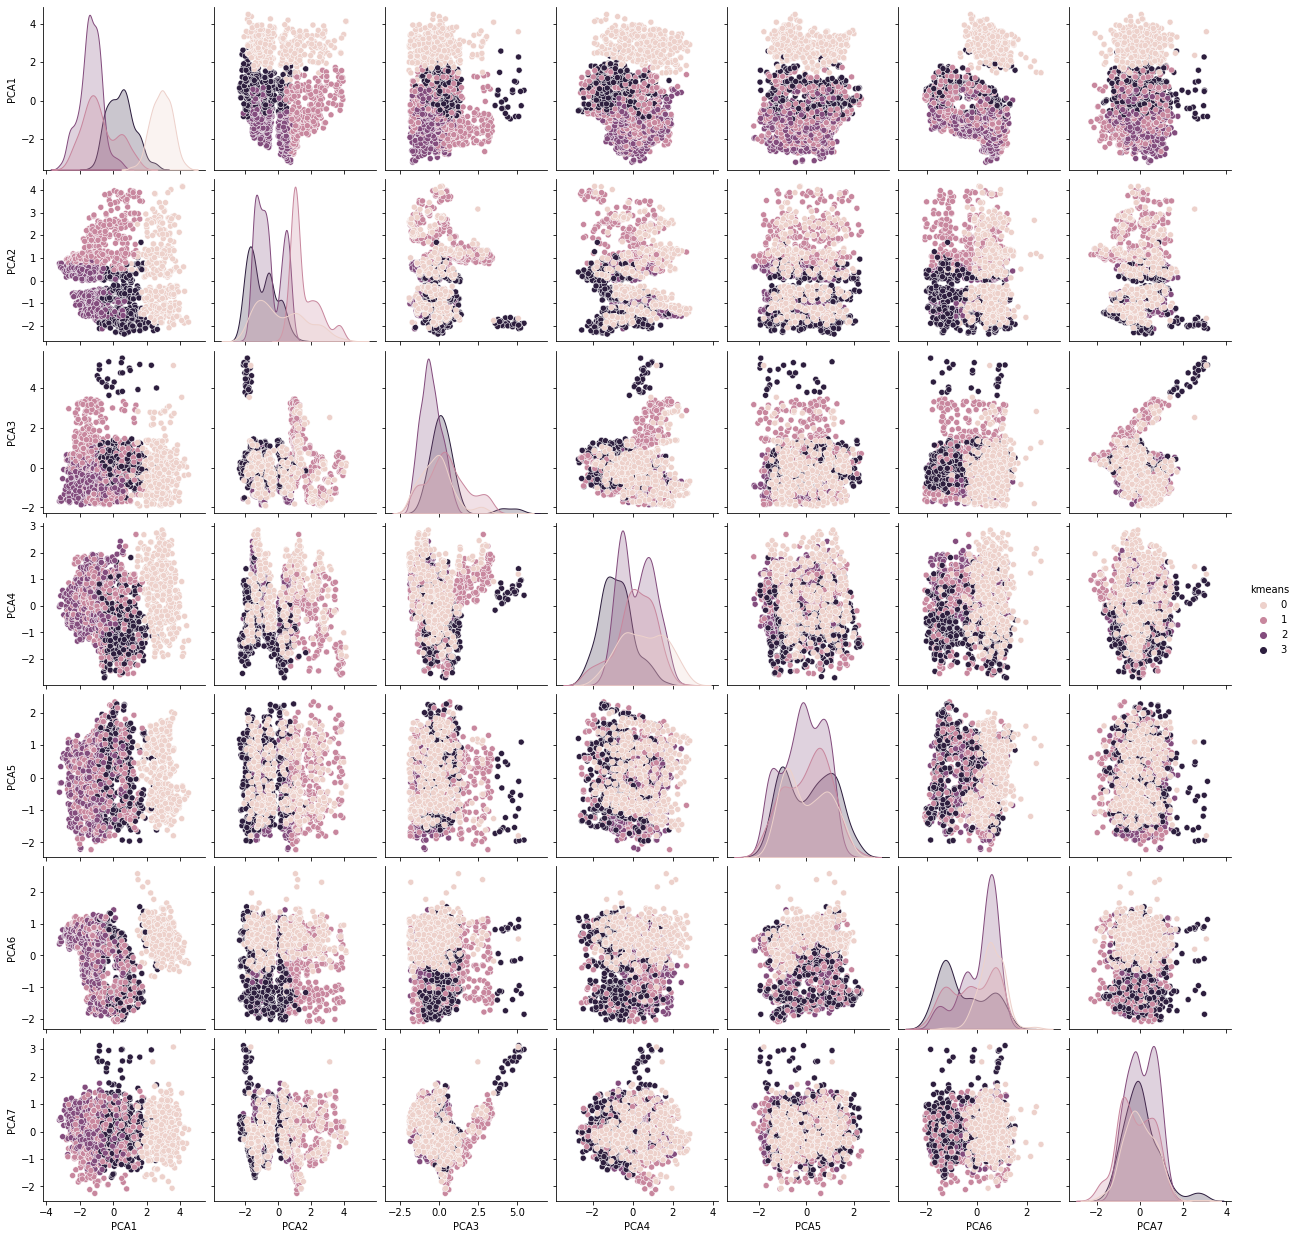

In [ ]:
group = KMeans(n_clusters=4).fit_predict(D)

df_grouped = d.copy()
df_grouped['kmeans'] = group
g = sns.pairplot(df_grouped, hue="kmeans")

In [ ]:
df_grouped.head(150)

PCA1      PCA2      PCA3  ...      PCA6      PCA7  kmeans
0   -3.215381  0.752837 -1.689635  ...  0.359476  0.414043       0
1   -3.158607  0.665432 -1.663043  ...  0.425675  0.445602       0
2   -3.102927  0.767481 -1.681427  ...  0.430484  0.438110       0
3   -3.136206  0.576603 -1.507641  ...  0.555289  0.507324       0
4   -2.722080  0.964346 -0.130432  ...  0.712525 -0.836675       0
..        ...       ...       ...  ...       ...       ...     ...
145 -1.722376  0.072918  0.061802  ... -0.874252  0.943013       0
146 -1.681584  1.030457  0.651954  ... -0.572210 -0.509515       0
147 -1.176195  0.533026  0.145965  ... -1.591084  0.225126       0
148 -1.038388 -0.580656 -0.026237  ... -1.684032 -0.677935       2
149 -1.058636  1.124491  0.767789  ... -1.509114 -1.447661       0

[150 rows x 8 columns]